In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, roc_curve, precision_recall_curve
from fundus_image_toolbox.quality_prediction import FundusQualityLoader, load_quality_ensemble, ensemble_predict_quality_from_dataloader

### Evaluate the ensemble model on DrimDB and/or DeepDRiD

Set the following as desired:

In [2]:
device = "cuda:0"

## Datasets
## Note: When running for the first time, data will be copied to a local folder in the project directory.

# DrimDB dir should contain "Bad", "Good" and "Outliers" folders
drimdb_dir = "../../fovea_detection/DrimDB/"
# DeepDRiD dir should contain "regular_fundus_images"
deepdrid_dir = "../../fovea_detection/DeepDRiD/"

# Threshold for binary classification: below this value, the image is considered of low quality
threshold = 0.5

# The model was trained on a development split of the joint "drimdb"-"deepdrid-isbi2020" datasets. 
# You can evaluate on its test split and/or on the individual test splits:
# datasets = [["drimdb", "deepdrid-isbi2020"], ["drimdb"], ["deepdrid-isbi2020"]]
# E.g., to evaluate on the "drimdb" test split only, set:
datasets = [["drimdb"]]

# Whether you want extra information to be printed
verbose = False

Now run the below code to evaluate the ensemble model.

In [3]:
ensemble = load_quality_ensemble(device=device)

Model loaded from 2024-05-03 14-38-34
Model loaded from 2024-05-03 14-25-19
Model loaded from 2024-05-03 14-25-42
Model loaded from 2024-05-03 14-58-37
Model loaded from 2024-05-03 16-23-29
Model loaded from 2024-05-03 15-28-00
Model loaded from 2024-05-03 15-04-29
Model loaded from 2024-05-06 20-25-14
Model loaded from 2024-05-03 15-52-56
Model loaded from 2024-05-03 15-59-31


######
 Using test splits from: ['drimdb'] datasets


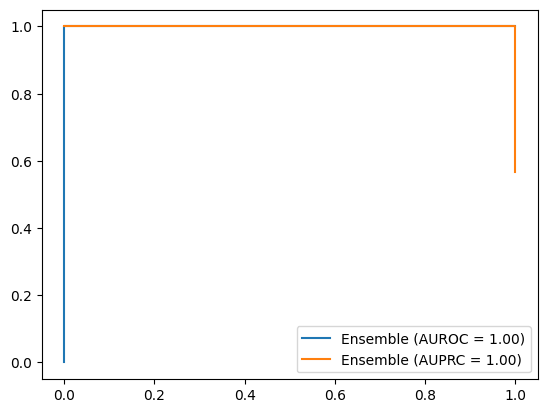

AUROC: 1.00
AUPRC: 1.00
Accuracy: 1.00
F1: 1.00
Precision: 1.00
Recall: 1.00



In [4]:
for ds in datasets:
    print(f"######\n Using test splits from: {ds} datasets")

    data_config = ensemble[0].config
    data_config.use_datasets = ds

    _, _, test_dataloader = FundusQualityLoader(
        data_config, verbose=verbose, drimdb_dir=drimdb_dir, deepdrid_dir=deepdrid_dir
        ).get_dataloaders()

    confs, preds, labels = ensemble_predict_quality_from_dataloader(
        ensemble, test_dataloader, threshold=threshold, print_result=verbose
        )

    # Accuracy
    accuracy = accuracy_score(labels, preds)

    # F1
    f1 = f1_score(labels, preds)

    # Precision
    precision = precision_score(labels, preds)

    # Recall
    recall = recall_score(labels, preds)

    # ROCAUC and Plot ROC
    fpr, tpr, _ = roc_curve(labels, confs)
    auroc = auc(fpr, tpr)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"Ensemble (AUROC = {auroc:.2f})")

    # AUPRC and Plot AUPRC
    precision_, recall_, _ = precision_recall_curve(labels, confs)
    auprc = auc(recall_, precision_)
    ax.plot(recall_, precision_, label=f"Ensemble (AUPRC = {auprc:.2f})")
    ax.legend()
    plt.show()

    print(f"AUROC: {auroc:.2f}")
    print(f"AUPRC: {auprc:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()